# Clustering

In [1]:
%load_ext autoreload
%autoreload 2
import os, inspect, sys
import cartopy.crs as ccrs
main_dir = os.path.join(
    os.path.dirname(
    os.path.dirname(
        os.path.abspath(inspect.getfile(inspect.currentframe())))),'RGCPD') # RGCPD folder directory
thesis_dir = os.path.dirname(main_dir)
data_dir = os.path.join(thesis_dir, 'Data')
RGCPD_func = os.path.join(main_dir, 'RGCPD')
cluster_func = os.path.join(main_dir, 'clustering')
if RGCPD_func not in sys.path:
    sys.path.append(RGCPD_func)
    sys.path.append(cluster_func)

In [9]:
%load_ext autoreload
%autoreload 2
import clustering_spatial as cl
from RGCPD import RGCPD
import plot_maps

#preprocessed target variable and precursors, with extent set to Europe and masked to sea/land. DOES NOT WORK YET
TV_prec_list_pp = [('value', 
                 os.path.join(thesis_dir, 'Data', 't2m_1950-2020_1-12_monthly_0.25deg_Europe_mask_v3.nc')),
                ('value',
                 os.path.join(thesis_dir, 'Data', 'sst_1950-2020_1_12_monthly_1.0deg_Europe_mask_v3.nc')),
                ('value',
                os.path.join(thesis_dir, 'Data', 'swvl_1950-2020_1_12_monthly_1.0deg_Europe_mask_v3.nc'))
               ]

#original, global datasets, non-masked
TV_prec_list_org = [('value', 
                 os.path.join(thesis_dir, 'Data', 't2m_1950-2020_1-12_monthly_0.25deg.nc')),
                ('value',
                 os.path.join(thesis_dir, 'Data', 'sst_1950-2020_1_12_monthly_1.0deg.nc')),
                ('value',
                os.path.join(thesis_dir, 'Data', 'swvl1_1950-2020_1_12_monthly_1.0deg.nc'))
               ]

#set start and end date for target variable
start_end_TVdate = ('01-01', '12-31')

rg = RGCPD(list_of_name_path = TV_prec_list_pp, start_end_TVdate = start_end_TVdate)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



Performing pre-processing value
sorting longitude

Handling time series longer then 120 day or monthly data, no smoothening applied
using absolute anomalies w.r.t. climatology of smoothed concurrent day accross years

Visual test latlon 47 336

C:\miniconda\envs\RGCPD1\lib\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)




Detrending ...


TypeError: 'tuple' object does not support item assignment

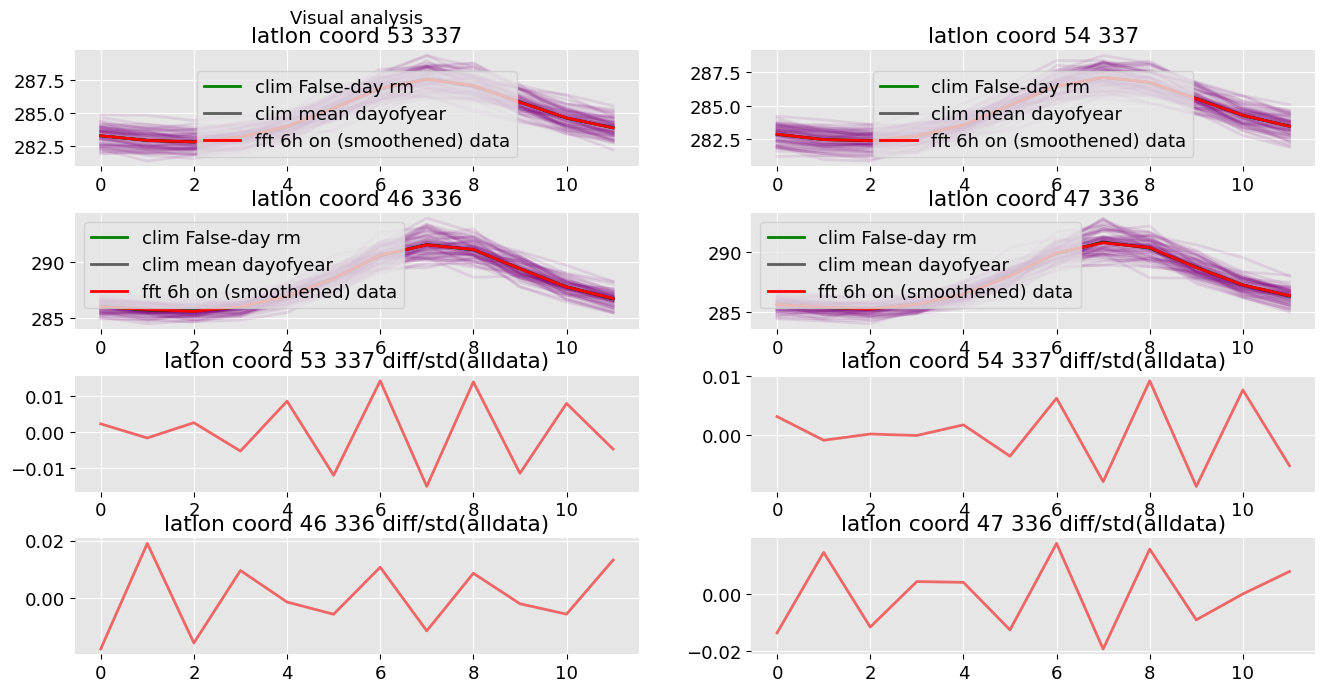

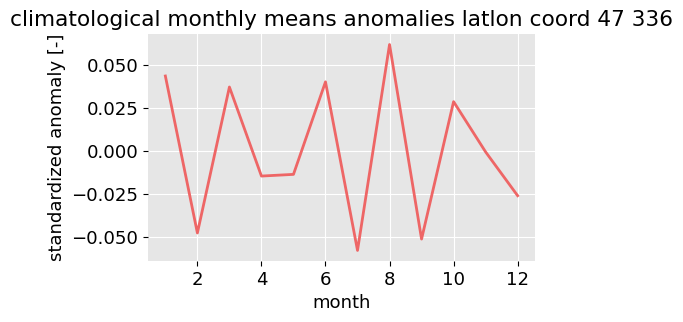

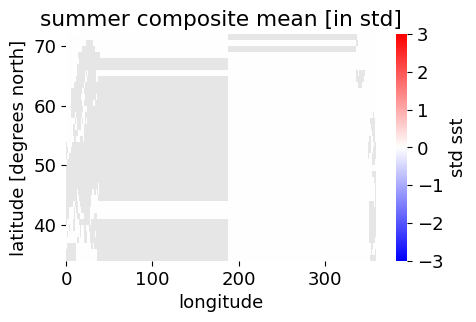

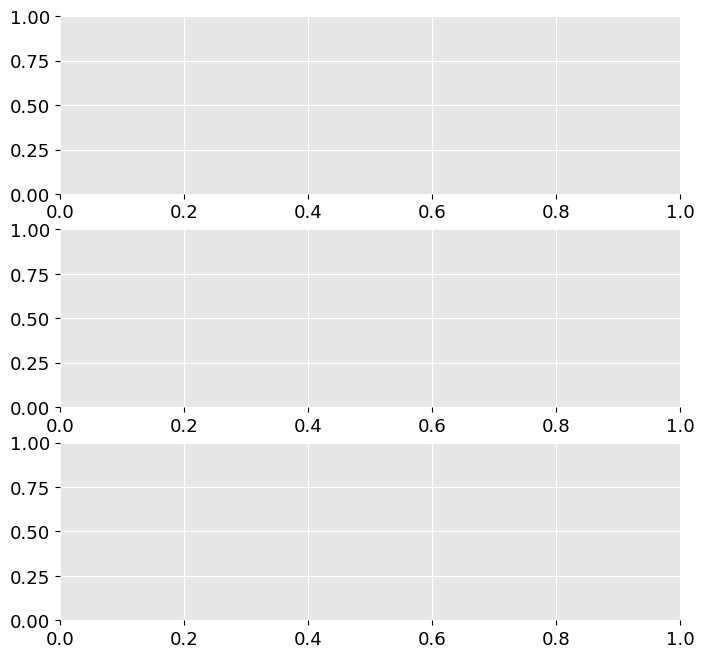

In [10]:
rg.pp_precursors()

In [4]:
rg.list_precur_pp

[('value',
  'C:\\Users\\Van Ingen\\Documents\\Jannes\\School\\VU\\Econometrics\\Thesis\\Data\\preprocessed\\sst_1950-2020_jan_dec_monthly_1.0deg.nc'),
 ('value',
  'C:\\Users\\Van Ingen\\Documents\\Jannes\\School\\VU\\Econometrics\\Thesis\\Data\\preprocessed\\swvl1_1950-2020_jan_dec_monthly_1.0deg.nc')]

sorting longitude
clustering fake: 0, n_clusters: 2
clustering fake: 0, n_clusters: 3


Plotting Corr maps sst, split 0, n_clusters 2
Plotting Corr maps sst, split 0, n_clusters 3
sorting longitude
clustering fake: 0, n_clusters: 2
clustering fake: 0, n_clusters: 3


Plotting Corr maps swvl1, split 0, n_clusters 2
Plotting Corr maps swvl1, split 0, n_clusters 3


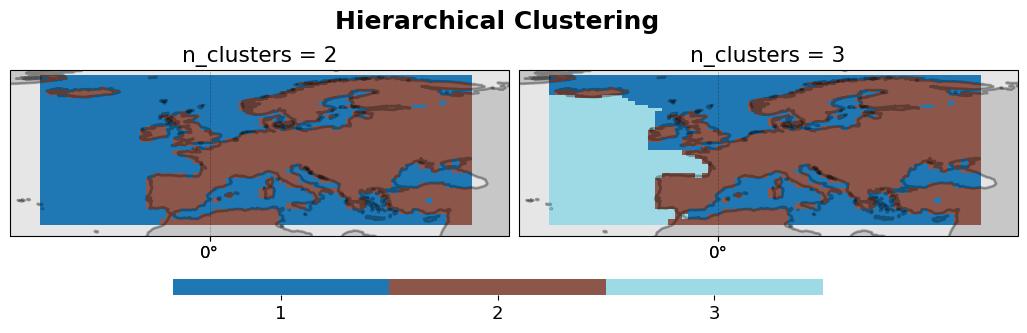

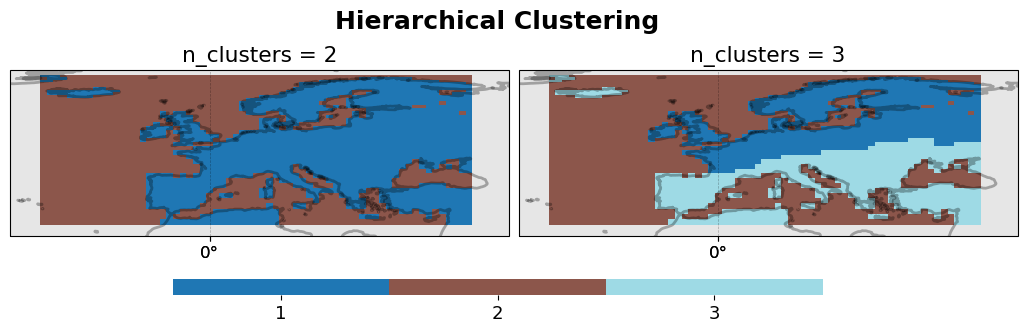

In [8]:
#cluster all precursors with some q to n clusters and show clustering maps
mask = [-25.0,40.0,32.0,72.0]
mask_arr = os.path.join(data_dir,'Europe_mask.nc')
q = 85
n_clusters = [2, 3]
projection = ccrs.LambertCylindrical(central_longitude = 0)

for i in rg.list_precur_pp:
    var_filename = i[1]
    xrclustered, results = cl.dendogram_clustering(var_filename, mask=mask_arr, 
                                                   kwrgs_clust={'q':q, 'n_clusters':n_clusters})
    fig = plot_maps.plot_labels(xrclustered, {'col_dim':'n_clusters', 'title':'Hierarchical Clustering', 'map_proj': projection,
                                             'zoomregion':(-30.0,45.0,32.0,75.0)})

In [7]:
mask = mask_arr
q = 85
projection = ccrs.LambertCylindrical(central_longitude=0)

for i in rg.list_precur_pp:
    var_filename = i[1]
    xrclustered, results = cl.sklearn_clustering(var_filename, mask=mask_arr, clustermethodkey='DBSCAN', kwrgs_clust={'eps':[90, 100]})
    xrclustered += 1
    fig = plot_maps.plot_labels(xrclustered, {'col_dim':'eps', 'title':'Density-Based Spatial Clustering of Applications with Noise'})




sorting longitude
clustering fake: 0, eps: 90 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<xarray.DataArray 'sst' (eps: 2, latitude: 5, longitude: 13)>
array([[[nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan]],

       [[nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan],
        [nan, nan,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4., nan,
         nan]]])
Coordinates:
  * eps        (eps) int64 90 100
  * latitude   (latitude) float64 27.5 32.5 37.5 42.5 47.5
  * longitude  (longitude) float64 177.5 182.5 187.5 192.5 ... 227.5 232.5 237.5
    mask       (latitude, longitude) bool True True True ... True True False
Attributes:
    long_name:     Sea surface temperature
    units:         K
    regridded:     bilinear_2.5d_to_5d
    is_DataArray:  1
    method:        DBSCAN
    kwrgs:         {'eps': [90, 100]}
    target:        sst
    hash:          a3926